# TD3 - Classification

On apprend à utiliser sklearn pour générer des modèles d'ACP prédictifs

In [12]:
# LIBRARY IMPORT
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets as datasets
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve

sns.set()


## 1. Dataset Iris

On charge le dataset classique Iris, qu'on divise en deux groupes:
- Les données de training (70%)
- Les données de test (30%)

In [13]:
iris = datasets.load_iris(as_frame=True)
training_data, test_data, training_targets, test_targets = train_test_split(
    iris.data, iris.target, test_size=0.3
)

print(f"training_data shape: {training_data.shape}")
values, frequencies = np.unique(training_targets, return_counts=True)
display(pd.DataFrame({"values": values, "frequencies": frequencies}))

print(f"test_data shape: {test_data.shape}")
values, frequencies = np.unique(test_targets, return_counts=True)
display(pd.DataFrame({"values": values, "frequencies": frequencies}))


training_data shape: (105, 4)


,values,frequencies
0,0,33
1,1,34
2,2,38


test_data shape: (45, 4)


,values,frequencies
0,0,17
1,1,16
2,2,12


On peut ensuite effectuer une LDA et tester le modèle:

In [14]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(training_data, training_targets)
predicted_classes = lda.predict(test_data)


Enfin, on peut tracer la matrice de confusion (normalisé ou non)

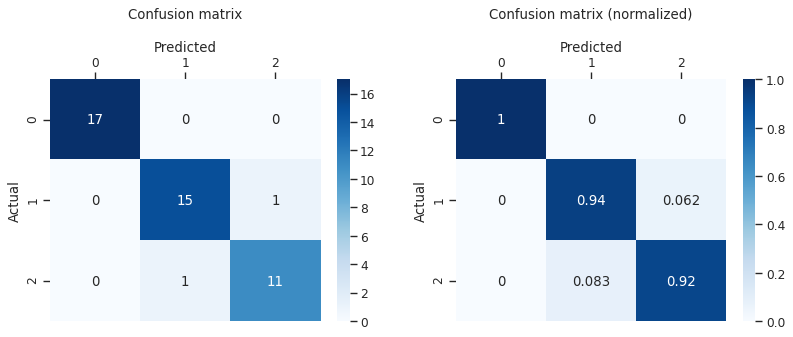

In [15]:
cm = confusion_matrix(test_targets, predicted_classes)
cm_normalized = confusion_matrix(test_targets, predicted_classes, normalize="true")

plt.figure(figsize=(12, 4), dpi=80)
ax = plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title(f"Confusion matrix", pad=20)
plt.ylabel(f"Actual")
plt.xlabel(f"Predicted")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

ax = plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, cmap="Blues")
plt.title(f"Confusion matrix (normalized)", pad=20)
plt.ylabel(f"Actual")
plt.xlabel(f"Predicted")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.yaxis.tick_left()


## 2. Dataset INFRACTUS

On veut maintenant étudier le dataset INFARCTUS

In [16]:
df = pd.read_excel("datasets/INFARCTU.xlsx", index_col=0)
# exclude rows with missing data
df = df[df["PRONO"] != "INCO"]

# Exclude label columns from main data
data = df.drop(["C"], axis=1)

# keep labels seperate
targets = df.C
target_names = df.PRONO.unique()

display(data)

,PRONO,FRCAR,INCAR,INSYS,PRDIA,PAPUL,PVENT,REPUL
Obs,,,,,,,,
1,SURVIE,90,1.71,19.0,16.0,19.5,16.0,912
2,DECES,90,1.68,18.7,24.0,31.0,14.0,1476
3,DECES,120,1.40,11.7,23.0,29.0,8.0,1657
4,SURVIE,82,1.79,21.8,14.0,17.5,10.0,782
5,DECES,80,1.58,19.7,21.0,28.0,18.5,1418
...,...,...,...,...,...,...,...,...
97,DECES,135,0.95,7.0,15.0,20.0,7.0,1684
98,DECES,105,1.92,18.3,18.0,24.0,3.0,1000
99,DECES,99,0.83,8.4,23.0,27.0,8.0,2602


### a. Analyse univariée

On commence par regarder la distibution des différentes variables en fonction de si le patient décède ou survit:

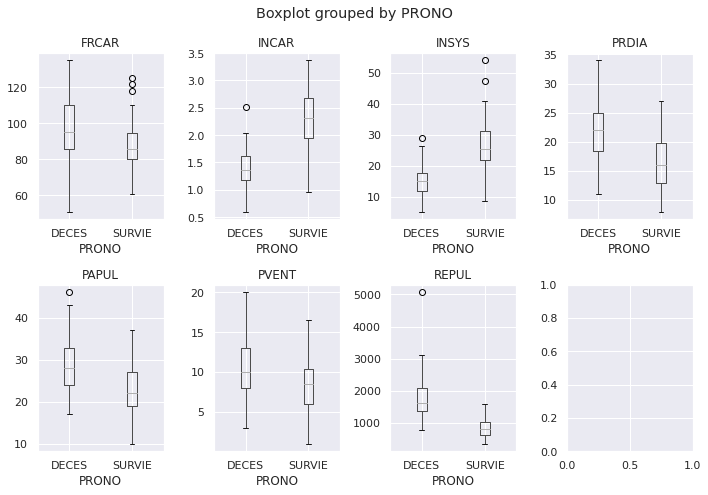

In [17]:
plt.rcParams['figure.figsize'] = [10, 7]
fig, axs = plt.subplots(2, 4)
for i, col in enumerate(data.columns[1:]):
    data.boxplot(col, by="PRONO", ax=axs[i // 4, i % 4])
plt.tight_layout()

### b. Analyse bivariée

On regarde ensuite si des corrélations évidentes se dégagent:

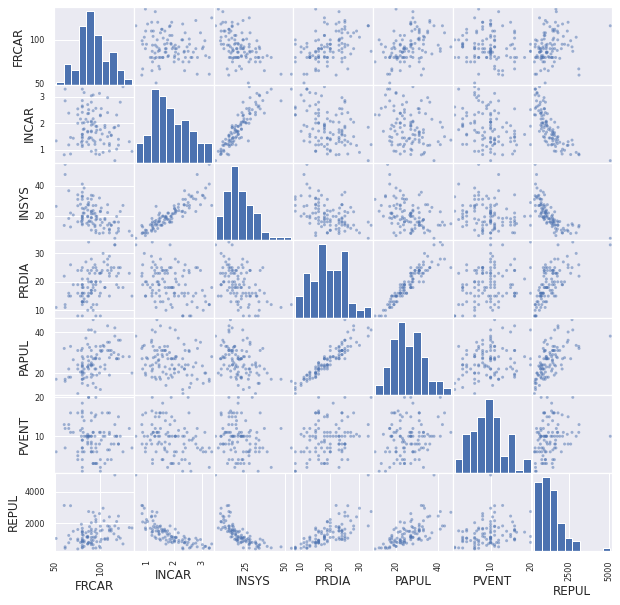

In [18]:
plt.rcParams['figure.figsize'] = [10, 10]
pd.plotting.scatter_matrix(data)
pass

### c. Analyse discriminante

On veut maintenant faire une analyse discriminante pour distinguer les classes

Text(0, 0.5, 'Class')

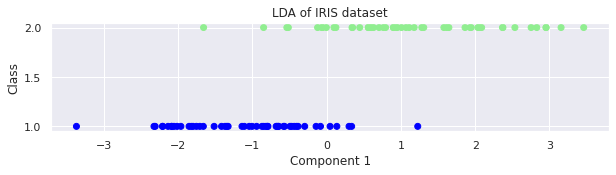

In [19]:
data_no_prono = data.drop("PRONO", axis=1)

lda = LinearDiscriminantAnalysis()
transformed_data = lda.fit_transform(data_no_prono, targets)

palette = ["red", "blue", "lightgreen"]
colours = [palette[i] for i in targets]

plt.rcParams['figure.figsize'] = [10, 2]
plt.scatter(transformed_data, targets, c=colours)
plt.title("LDA of IRIS dataset")
plt.xlabel("Component 1")
plt.ylabel("Class")

### d. Courbes ROC

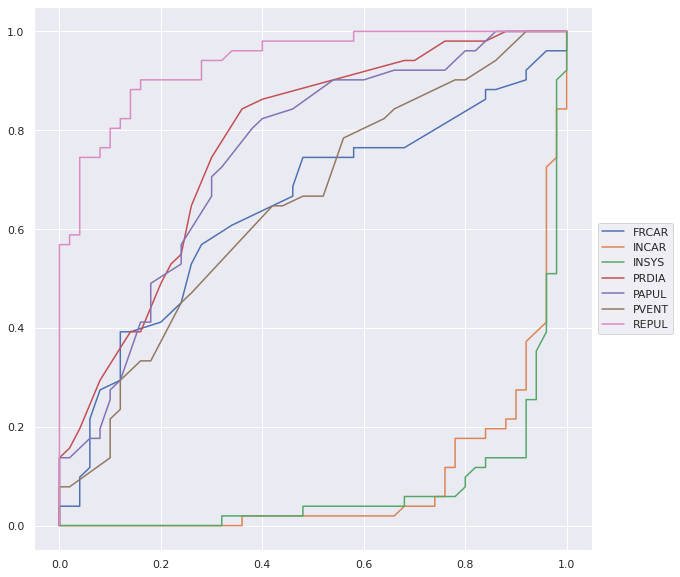

In [22]:
plt.rcParams['figure.figsize'] = [10, 10]

for col in data_no_prono.columns:
    FP, TP, Th = roc_curve(targets, data_no_prono[col], pos_label=1)
    plt.plot(FP, TP, label=col)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))